 # Tinder Reviews Sentiment Analysis using Python

 



Tinder is a popular dating application that connects people based on their interests. By analyzing the sentiments of people about Tinder, we can gain insights into how users perceive the app and whether it helps them find partners.

In this notebook, we will use Python and several libraries, including `pandas`, `matplotlib`, `nltk`, `re`, and `wordcloud`, to analyze the sentiments of Tinder users based on their reviews on the Google Play Store. We will first collect the data using the Google Play API and then clean and preprocess the data to prepare it for analysis.

Next, we will use natural language processing techniques to analyze the sentiment of the reviews. We will use the nltk library to tokenize the text, remove stop words, and perform stemming to reduce the number of unique words in the text. We will then use the `VADER` (Valence Aware Dictionary and sEntiment Reasoner) library to calculate the sentiment scores of each review.

We will also generate word clouds to visualize the most common words in the reviews and gain insights into what users are saying about Tinder.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string


In [3]:

url= "/content/tinder_google_play_reviews.csv"

data = pd.read_csv(url)
print(data.head())

                               reviewId          userName  \
0  bf34961b-905e-408f-9ef5-57617f220ebb            Marcos   
1  db3db6c0-c1c1-49c7-8cc2-8fea76cbb9e3  Dionis Muzenidis   
2  141c5d3e-1891-4218-8a2a-3e13b1ea3e78     Chad Urbanski   
3  94c9d45d-d41f-4fe6-9b41-a9121b414851       Parthiban L   
4  df7d355d-ff95-490e-9aa6-5f1ee8d1d2b0   Lindsay Arisman   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AGNmyx...   
1  https://play-lh.googleusercontent.com/a/AGNmyx...   
2  https://play-lh.googleusercontent.com/a/AGNmyx...   
3  https://play-lh.googleusercontent.com/a-/ACB-R...   
4  https://play-lh.googleusercontent.com/a-/ACB-R...   

                                             content  score  thumbsUpCount  \
0  Update: matched w alot of women, but not every...    5.0            0.0   
1  seems like app is outdated and does not work a...    1.0            0.0   
2  Please do something about all the fake profile...    2.0   

To analyze the Tinder reviews, we only need the content column. I'll create a new dataset with the content column and move further:

In [5]:
data = data[["content"]]

Remove the null values and move on

In [8]:
data.isnull().sum()
data = data.dropna()

Prepare the data for the task of sentiment analysis.

In [9]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Let’s have a look at the kind of words people use in the reviews of Tinder:

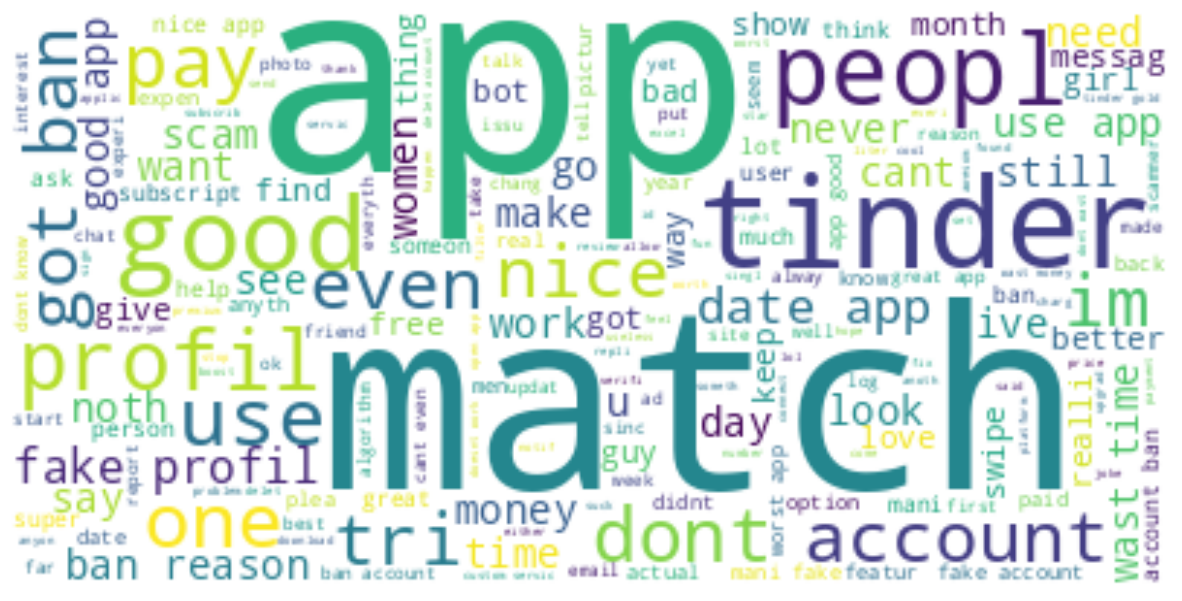

In [10]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I'll add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             content  Positive  Negative  \
0  updat match w alot women everyon compat good t...     0.326     0.000   
1  seem like app outdat work intend noth even thi...     0.161     0.000   
2                  pleas someth fake profil chat bot     0.000     0.383   
3              worst experi subscribt quot high good     0.264     0.373   
4                                     got ban reason     0.000     0.643   

   Neutral  
0    0.674  
1    0.839  
2    0.617  
3    0.364  
4    0.357  


Let’s look at the kind of words people use in the positive reviews of Tinder:


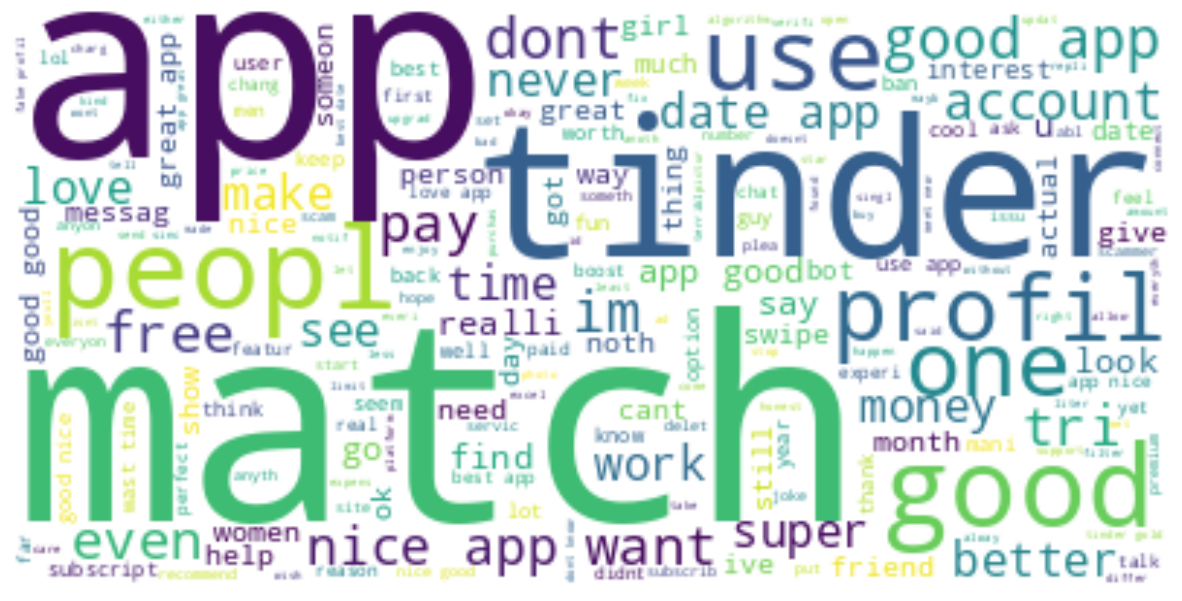

In [12]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the kind of words people use in the negative reviews of Tinder:



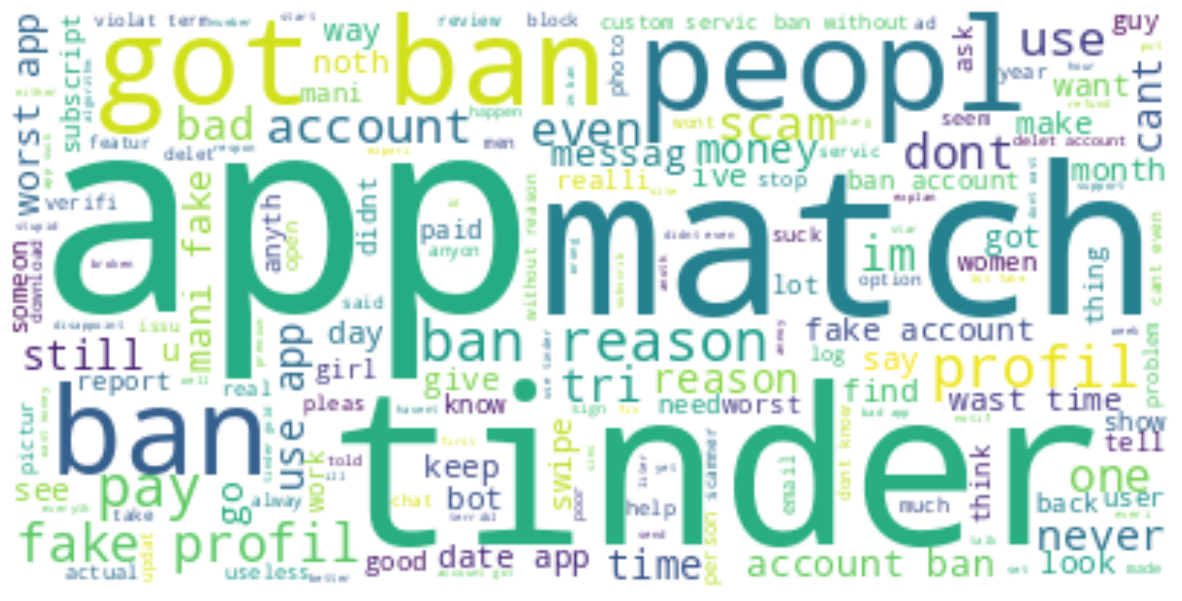

In [13]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Overall sentiment score of the users of Tinder



In [16]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive  🙂  ")
    elif (b>a) and (b>c):
        print("Negative  😒   ")
    else:
        print("Neutral 😑  ")
sentiment_score(x, y, z)

Neutral 😑  


The most of the users in this data set write reviews neutrally about Tinder experience 

Let’s have a look at the total of all the sentiment scores

In [18]:
print("Positive 🙂: ", x)
print("Negative 😒: ", y)
print("Neutral 😑 : ", z)

Positive 🙂:  6375.65399999999
Negative 😒:  3488.8600000000033
Neutral 😑 :  13827.51199999995


So in this data set, the users wrote  more Neutral reviews! So it might the dating app are not the best option to date.